# Análisis descriptivo - CineVision Studios
Aquí se contiene la resolución del ejercicio #4 y #5 con las consultas correspondientes.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from num2words import num2words

sns.set_theme(style="whitegrid")

file_path = "./movies.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

### Pregunta 1
¿Cuáles son las 10 películas que contaron con más presupuesto?

In [9]:
top_budget_movies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)

top_budget_movies = top_budget_movies.assign(
    budget_formatted=top_budget_movies['budget'].apply(lambda y: f"${y:,.2f}"),
    budget_text=top_budget_movies['budget'].apply(lambda y: num2words(y, lang='es').capitalize() + " dólares")
)

pd.set_option('display.max_colwidth', None)

display(top_budget_movies)


,title,budget,budget_formatted,budget_text
716,Pirates of the Caribbean: On Stranger Tides,380000000,"$380,000,000.00",Trescientos ochenta millones dólares
4710,Avengers: Age of Ultron,365000000,"$365,000,000.00",Trescientos sesenta y cinco millones dólares
5952,Avengers: Endgame,356000000,"$356,000,000.00",Trescientos cincuenta y seis millones dólares
4953,Justice League,300000000,"$300,000,000.00",Trescientos millones dólares
5953,Avengers: Infinity War,300000000,"$300,000,000.00",Trescientos millones dólares
163,Pirates of the Caribbean: At World's End,300000000,"$300,000,000.00",Trescientos millones dólares
607,Superman Returns,270000000,"$270,000,000.00",Doscientos setenta millones dólares
7134,The Lion King,260000000,"$260,000,000.00",Doscientos sesenta millones dólares
3791,Tangled,260000000,"$260,000,000.00",Doscientos sesenta millones dólares
280,Spider-Man 3,258000000,"$258,000,000.00",Doscientos cincuenta y ocho millones dólares


### Pregunta 2
¿Cuáles son las 10 películas que más ingresos tuvieron?

In [8]:
top_revenue_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

top_revenue_movies = top_revenue_movies.assign(
    revenue_formatted=top_revenue_movies['revenue'].apply(lambda y: f"${y:,.2f}"),
    revenue_text=top_revenue_movies['revenue'].apply(lambda y: num2words(y, lang='es').capitalize() + " dólares")
)

pd.set_option('display.max_colwidth', None)

display(top_revenue_movies)

,title,revenue,revenue_formatted,revenue_text
3210,Avatar,2.847246e+09,"$2,847,246,203.00",Dos mil ochocientos cuarenta y siete millones doscientos cuarenta y seis mil doscientos tres dólares
5952,Avengers: Endgame,2.797801e+09,"$2,797,800,564.00",Dos mil setecientos noventa y siete millones ochocientos mil quinientos sesenta y cuatro dólares
307,Titanic,2.187464e+09,"$2,187,463,944.00",Dos mil ciento ochenta y siete millones cuatrocientos sesenta y tres mil novecientos cuarenta y cuatro dólares
4947,Star Wars: The Force Awakens,2.068224e+09,"$2,068,223,624.00",Dos mil sesenta y ocho millones doscientos veintitrés mil seiscientos veinticuatro dólares
5953,Avengers: Infinity War,2.046240e+09,"$2,046,239,637.00",Dos mil cuarenta y seis millones doscientos treinta y nueve mil seiscientos treinta y siete dólares
4914,Jurassic World,1.671713e+09,"$1,671,713,208.00",Mil seiscientos setenta y uno millones setecientos trece mil doscientos ocho dólares
7134,The Lion King,1.667635e+09,"$1,667,635,327.00",Mil seiscientos sesenta y siete millones seiscientos treinta y cinco mil trescientos veintisiete dólares
9049,Spider-Man: No Way Home,1.631853e+09,"$1,631,853,496.00",Mil seiscientos treinta y uno millones ochocientos cincuenta y tres mil cuatrocientos noventa y seis dólares
3397,The Avengers,1.518816e+09,"$1,518,815,515.00",Mil quinientos dieciocho millones ochocientos quince mil quinientos quince dólares
5087,Furious 7,1.515048e+09,"$1,515,047,671.00",Mil quinientos quince millones cuarenta y siete mil seiscientos setenta y uno dólares


## Preguntas predefinidas

### Pregunta 9
¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

Correlaciones entre elenco y éxito de película:
                 castWomenAmount  castMenAmount  castWomenRatio  popularity  \
castWomenAmount         1.000000      -0.090474        0.367133   -0.001778   
castMenAmount          -0.090474       1.000000       -0.303371    0.002779   
castWomenRatio          0.367133      -0.303371        1.000000    0.007635   
popularity             -0.001778       0.002779        0.007635    1.000000   
revenue                -0.037397      -0.060143       -0.060991    0.162546   

                  revenue  
castWomenAmount -0.037397  
castMenAmount   -0.060143  
castWomenRatio  -0.060991  
popularity       0.162546  
revenue          1.000000  


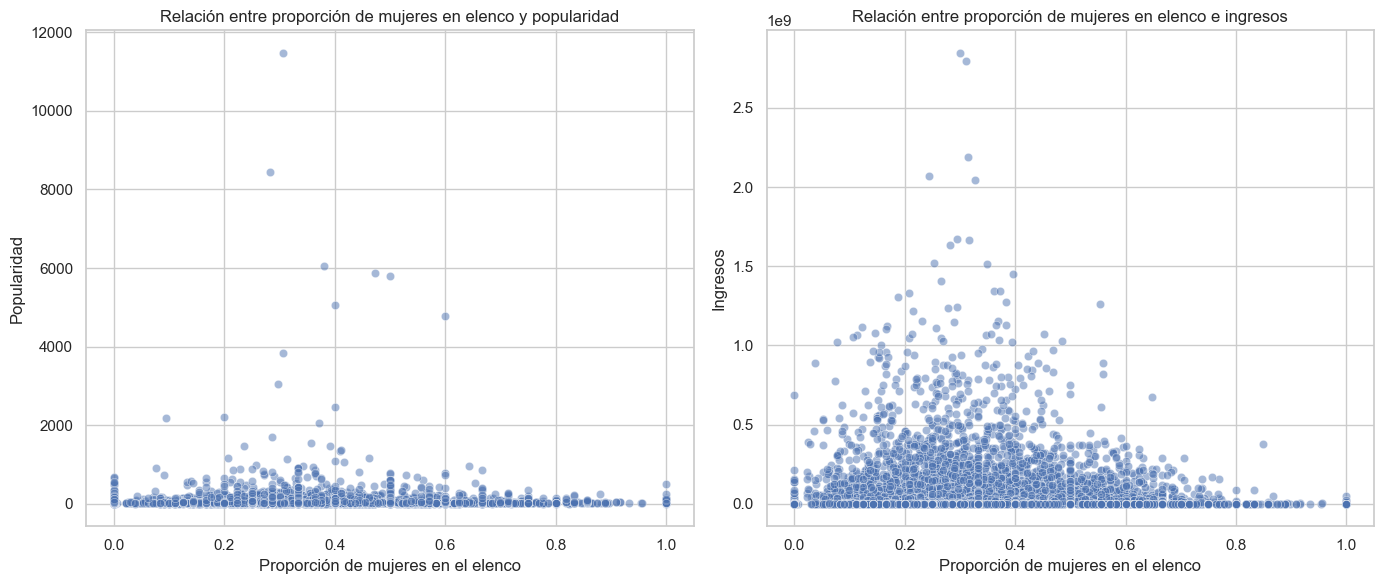

In [154]:

df["castWomenAmount"] = pd.to_numeric(df["castWomenAmount"], errors="coerce")
df["castMenAmount"] = pd.to_numeric(df["castMenAmount"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

df["castWomenRatio"] = df["castWomenAmount"] / (df["castWomenAmount"] + df["castMenAmount"])

correlations = df[["castWomenAmount", "castMenAmount", "castWomenRatio", "popularity", "revenue"]].corr()
print("Correlaciones entre elenco y éxito de película:")
print(correlations)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df, x="castWomenRatio", y="popularity", alpha=0.5, ax=axes[0])
axes[0].set_title("Relación entre proporción de mujeres en elenco y popularidad")
axes[0].set_xlabel("Proporción de mujeres en el elenco")
axes[0].set_ylabel("Popularidad")

sns.scatterplot(data=df, x="castWomenRatio", y="revenue", alpha=0.5, ax=axes[1])
axes[1].set_title("Relación entre proporción de mujeres en elenco e ingresos")
axes[1].set_xlabel("Proporción de mujeres en el elenco")
axes[1].set_ylabel("Ingresos")

plt.tight_layout()
plt.show()

> Según los gráficos de correlación, se observa que la relación es bastante debil tomando en cuenta la proporción de mujeres como pivote. Dando como resultado que no sea posible asumir que la popularidad o los ingresos se relacionen con la proporción de hombres y mujeres en el reparto.

### Pregunta 10
¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [155]:
df["voteAvg"] = pd.to_numeric(df["voteAvg"], errors="coerce")
df["director"] = df["director"].astype(str).str.split("|")
df_exploded = df.explode("director")
top_20_directors = df_exploded.nlargest(20, "voteAvg")["director"].unique()
print("Los 20 directores de las películas mejor calificadas:")
print(top_20_directors)

Los 20 directores de las películas mejor calificadas:
['Thomas Coven' 'Víctor Barba' 'Juan Olivares' 'Rebecca Sugar'
 'Laurent Bouzereau' 'Kaku Arakawa' 'Christin Baker' 'nan'
 'Miguel Angel Zavala' 'Dave Bullock' 'Troy Adomitis' 'Victor Cook'
 'Samuel Leong' 'Won Myeong-jun' 'Selena Quintanilla' 'Haruo Sotozaki']


### Pregunta 11
¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión.

Correlación entre presupuesto e ingresos: 0.7186532245805861


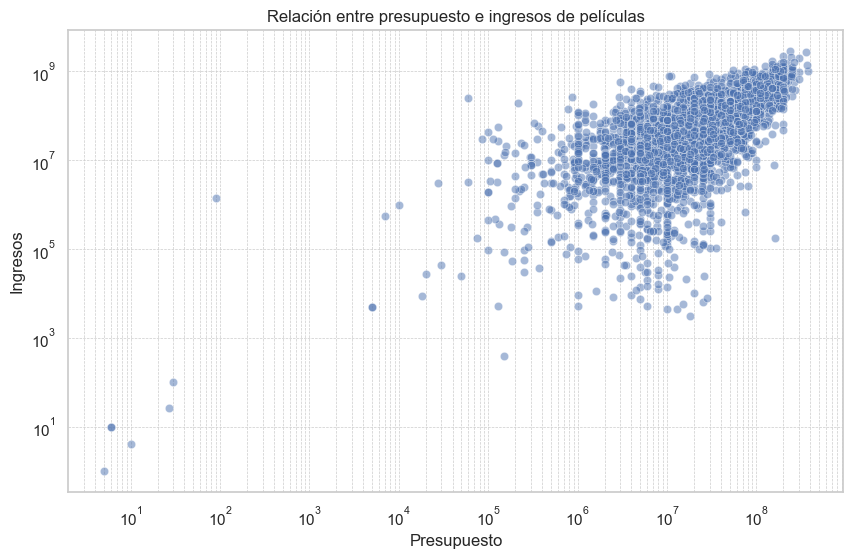

In [156]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

df_filtered = df[(df["budget"] > 0) & (df["revenue"] > 0)]

correlation = df_filtered["budget"].corr(df_filtered["revenue"])
print(f"Correlación entre presupuesto e ingresos: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="budget", y="revenue", alpha=0.5)
plt.title("Relación entre presupuesto e ingresos de películas")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.xscale("log")  # Escala logarítmica para ver los datos de mejor manera
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

> Parece ser que que sí existe un relación entre el presupuesto e ingresos, sin embargo, sí que hay algunas películas de presupuestos bajos que produjeron más, y también hay películas de altos presupuesto que produjeron mucho menos.

### Pregunta 12
¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

Ingresos promedio por mes:
releaseMonth
1     6.946513e+07
2     8.299534e+07
3     9.710837e+07
4     1.019682e+08
5     1.652726e+08
6     1.658074e+08
7     1.327641e+08
8     7.077733e+07
9     6.033503e+07
10    8.497647e+07
11    1.403750e+08
12    1.355274e+08
Name: revenue, dtype: float64


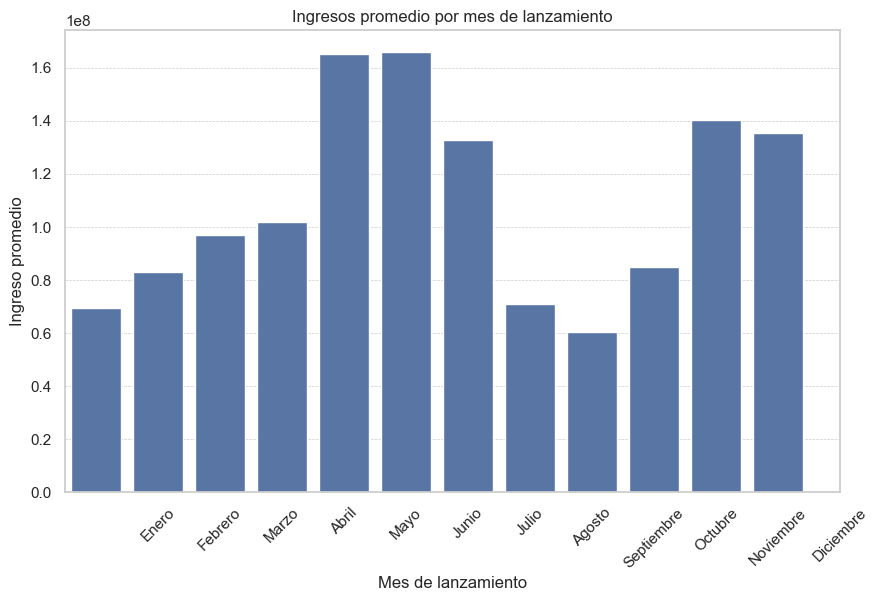

In [157]:
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors='coerce')
df["releaseMonth"] = df["releaseDate"].dt.month
df_valid = df[df["revenue"] > 0]
avg_revenue_by_month = df_valid.groupby("releaseMonth")["revenue"].mean()
print("Ingresos promedio por mes:")
print(avg_revenue_by_month)

# Graficar los ingresos promedio por mes
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_revenue_by_month.index, y=avg_revenue_by_month.values)
plt.title("Ingresos promedio por mes de lanzamiento")
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingreso promedio")
plt.xticks(range(1, 13), [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
], rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

> Abril y Mayo principalmente podrían aumentar las posibilidades de tener mejores ingresos, parece ser que se lanzan películas esperadas o un aumento en la asistencia en cines que podría mejorar las ventas. Además de mencionar que también hay ventas altas a finales de año.

### Pregunta #13
¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuántas películas, en promedio, se han lanzado por mes?

El mes con los mayores ingresos totales es 6 con ingresos de 77597881637.0.
En promedio, se lanzan 833.33 películas por mes.


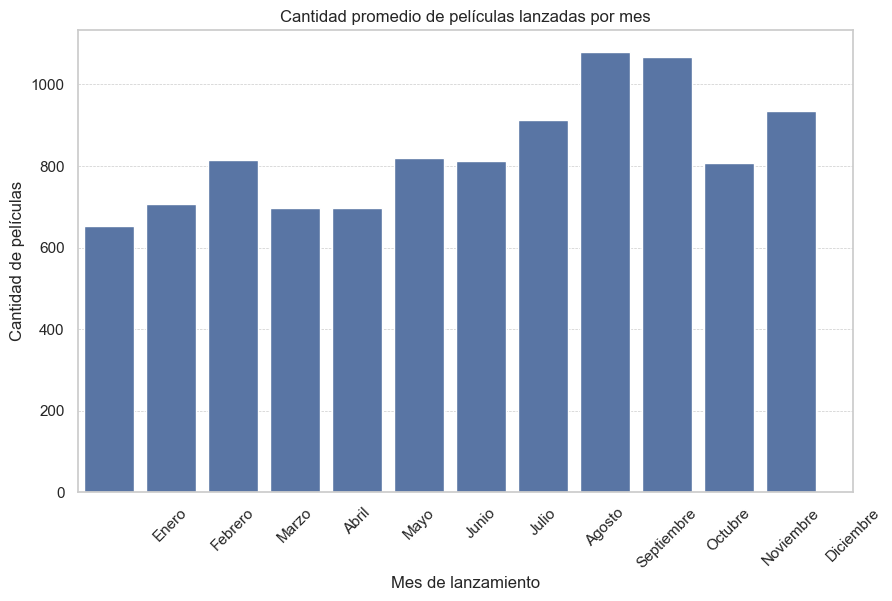

In [158]:
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")
df["releaseMonth"] = df["releaseDate"].dt.month
df_valid = df[df["revenue"] > 0]

monthly_revenue = df_valid.groupby("releaseMonth")["revenue"].sum()
monthly_movie_count = df.groupby("releaseMonth").size()

avg_movies_per_month = monthly_movie_count.mean()

best_month = monthly_revenue.idxmax()
best_month_revenue = monthly_revenue.max()

# El mes con más ingresos totales
print(f"El mes con los mayores ingresos totales es {best_month} con ingresos de {best_month_revenue}.")
print(f"En promedio, se lanzan {avg_movies_per_month:.2f} películas por mes.") # Promedio de películas lanzadas por mes

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_movie_count.index, y=monthly_movie_count.values)
plt.title("Cantidad promedio de películas lanzadas por mes")
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Cantidad de películas")
plt.xticks(range(1, 13), [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
], rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

> Junio es el mes en el que más ingresos se ha acumulado, es decir, han habido más estrenos taquilleros a comparación de otros meses, porque a diferencia de otros meses no ha llegado ha ser el mes con más lanzamientos.

### Pregunta 14
¿Cómo se correlacionan las calificaciones con el éxito comercial?

Correlación entre calificación promedio e ingresos: 0.16776338970352325


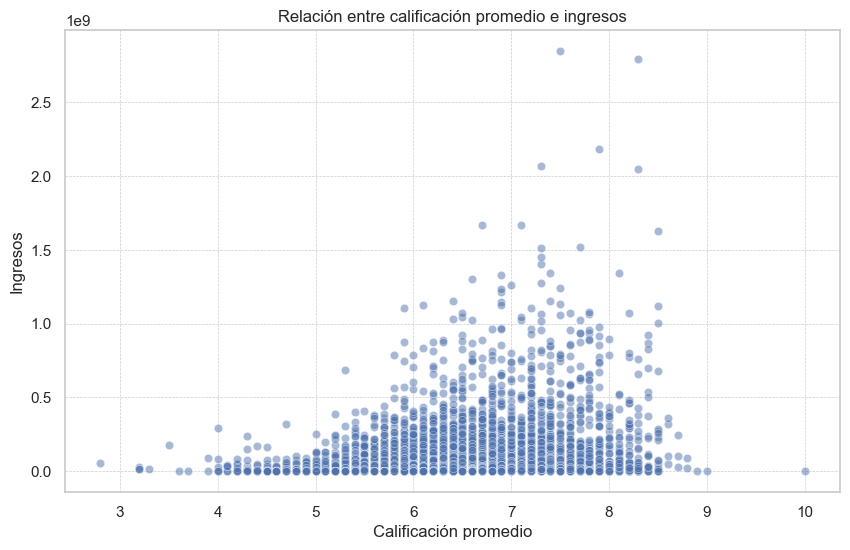

In [159]:
df["voteAvg"] = pd.to_numeric(df["voteAvg"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df_valid = df[(df["revenue"] > 0) & (df["voteAvg"].notna())]
correlation_rating_revenue = df_valid["voteAvg"].corr(df_valid["revenue"])
print(f"Correlación entre calificación promedio e ingresos: {correlation_rating_revenue}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid, x="voteAvg", y="revenue", alpha=0.5)
plt.title("Relación entre calificación promedio e ingresos")
plt.xlabel("Calificación promedio")
plt.ylabel("Ingresos")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

> Haciendo énfasis en la correlación (~0.1677) se puede ver que no necesariamente las películas con mayor calificación tienen mayores ingresos.

### Pregunta 15
¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

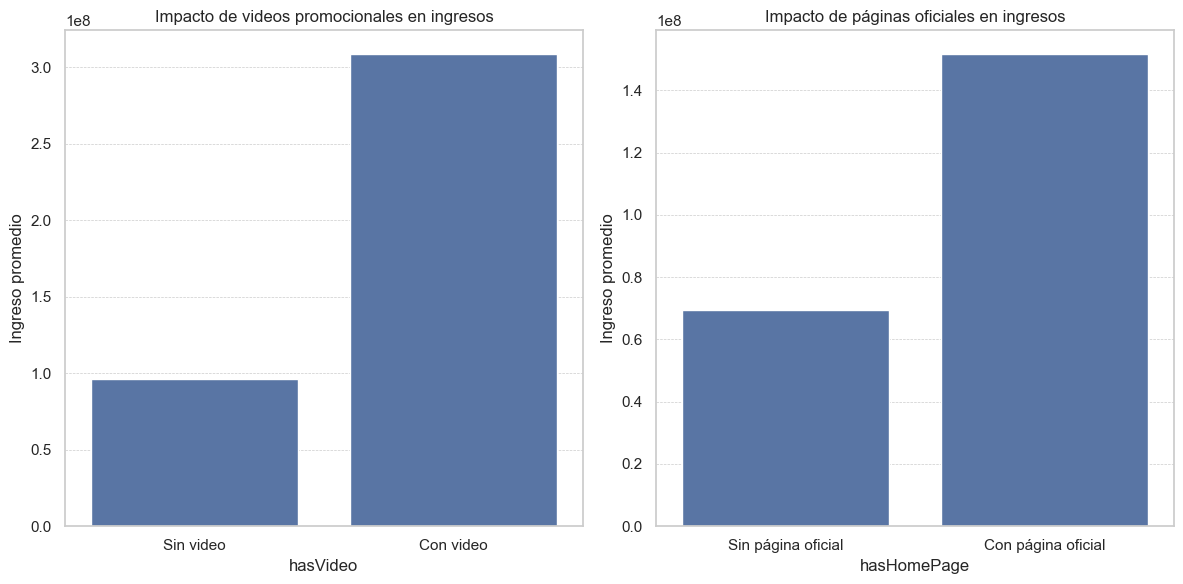

In [160]:
# Convertir la columna de ingresos a numérica
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

df_valid = df[df["revenue"] > 0].copy()
df_valid.loc[:, "hasVideo"] = df_valid["video"].astype(bool)
df_valid.loc[:, "hasHomePage"] = df_valid["homePage"].notna()

avg_revenue_by_video = df_valid.groupby("hasVideo")["revenue"].mean()
avg_revenue_by_homepage = df_valid.groupby("hasHomePage")["revenue"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=avg_revenue_by_video.index, y=avg_revenue_by_video.values, ax=axes[0])
axes[0].set_title("Impacto de videos promocionales en ingresos")
axes[0].set_xticks([0, 1])  
axes[0].set_xticklabels(["Sin video", "Con video"])
axes[0].set_ylabel("Ingreso promedio")
axes[0].grid(axis="y", linestyle="--", linewidth=0.5)

sns.barplot(x=avg_revenue_by_homepage.index, y=avg_revenue_by_homepage.values, ax=axes[1])
axes[1].set_title("Impacto de páginas oficiales en ingresos")
axes[1].set_xticks([0, 1]) 
axes[1].set_xticklabels(["Sin página oficial", "Con página oficial"])
axes[1].set_ylabel("Ingreso promedio")
axes[1].grid(axis="y", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

> A simple vista se nota que las películas con videos promocionales son mucho más exitosas en términos monetarios, que las que no los tienen, además de tener cierta ventaja contra las páginas promocionales.

### Pregunta 16
¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

Correlación entre la popularidad promedio del elenco y los ingresos: 0.1179


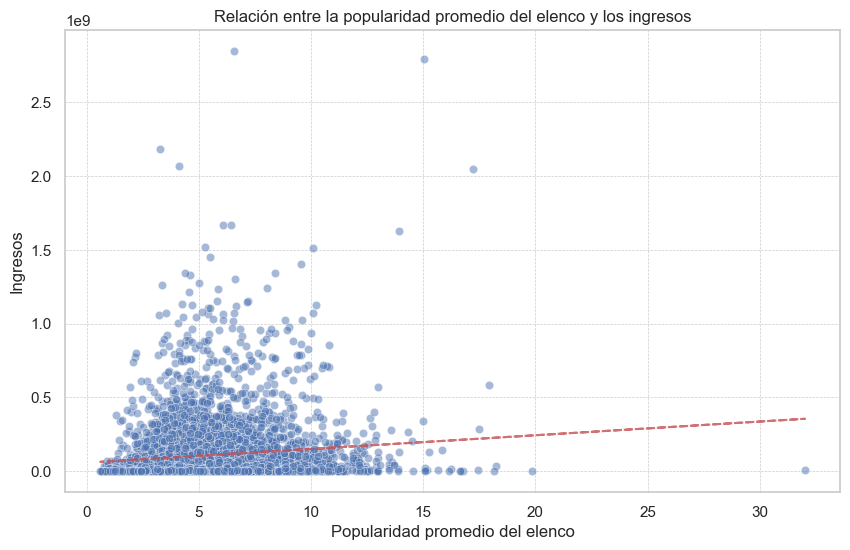

In [161]:
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df["actorsPopularity"] = df["actorsPopularity"].astype(str)
df["avg_actor_popularity"] = df["actorsPopularity"].apply(
    lambda x: pd.to_numeric(str(x).split("|"), errors="coerce").mean()
)
df_valid = df[(df["revenue"] > 0) & (df["avg_actor_popularity"].notna())]
correlation = df_valid["avg_actor_popularity"].corr(df_valid["revenue"])
print(f"Correlación entre la popularidad promedio del elenco y los ingresos: {correlation:.4f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid, x="avg_actor_popularity", y="revenue", alpha=0.5)
plt.title("Relación entre la popularidad promedio del elenco y los ingresos")
plt.xlabel("Popularidad promedio del elenco")
plt.ylabel("Ingresos")
plt.grid(True, linestyle="--", linewidth=0.5)

z = np.polyfit(df_valid["avg_actor_popularity"], df_valid["revenue"], 1)
p = np.poly1d(z)
plt.plot(df_valid["avg_actor_popularity"], p(df_valid["avg_actor_popularity"]), "r--", alpha=0.8)

plt.show()

> Tomando encuenta el elenco como un todo (promedio), podemos decir que su popularidad no se relaciona con los ingresos que puedan obtener, esto no quiere decir que las personas vean ciertas películas por ciertos actores, se necesitaría cierto análisis para llegar a esa conclusión.

## Preguntas sugeridas
Se añaden algunas preguntas que se consideran importantes para el contexto del análisis exploratorio.

### Pregunta 1
¿Cuáles son los 20 actores más recurrentes en las películas del dataset?

/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_46511/1631471060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors_cleaned_final.values, y=top_actors_cleaned_final.index, palette="Blues_r")


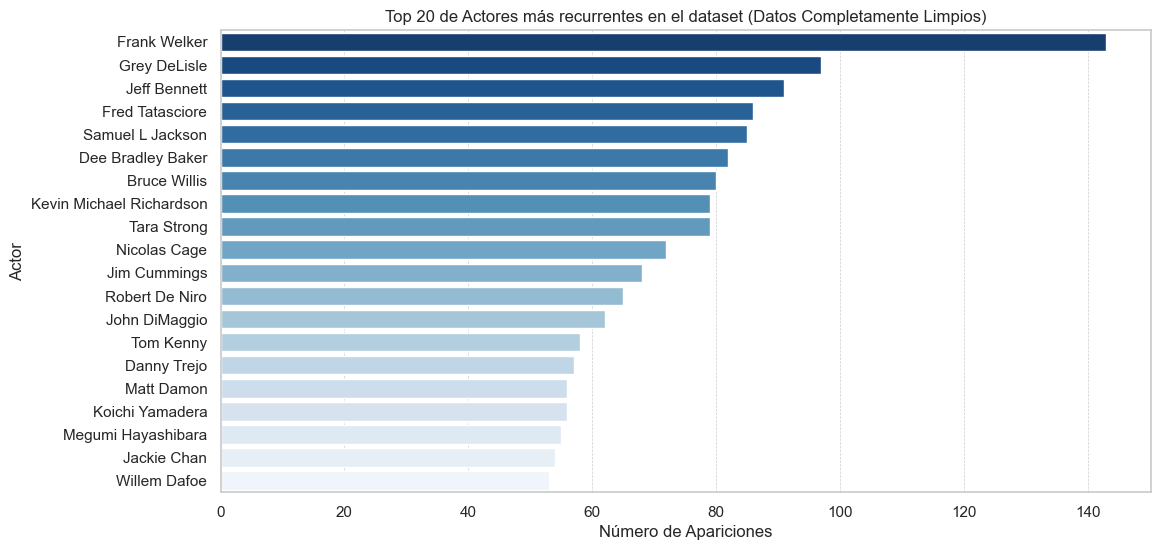

In [162]:
actors_exploded_cleaned = actors_exploded_cleaned[actors_exploded_cleaned["actors"] != "FALSE"]
actor_counts_cleaned_final = actors_exploded_cleaned["actors"].value_counts()
top_actors_cleaned_final = actor_counts_cleaned_final.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors_cleaned_final.values, y=top_actors_cleaned_final.index, palette="Blues_r")
plt.xlabel("Número de Apariciones")
plt.ylabel("Actor")
plt.title("Top 20 de Actores más recurrentes en el dataset (Datos Completamente Limpios)")
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.show()

actors_recurrence_table_final = top_actors_cleaned_final.reset_index()
actors_recurrence_table_final.columns = ["Actor", "Número de Apariciones"]


### Pregunta 2
¿Existe una relación entre la duración de la película y su éxito financiero?

Correlación entre la duración de la película y su éxito financiero: 0.24865547233412905


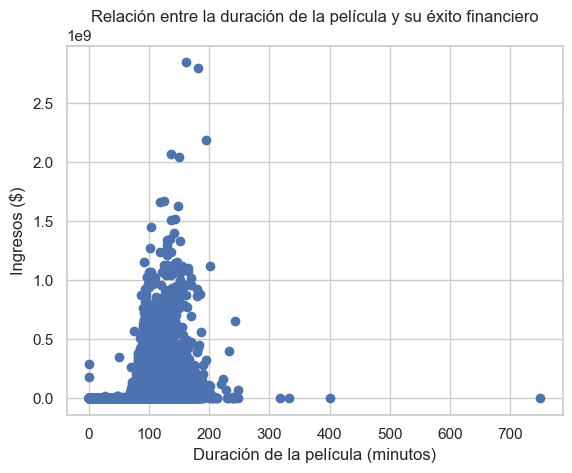

In [163]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df.dropna(subset=['runtime', 'revenue'], inplace=True)
correlation = df['runtime'].corr(df['revenue'])
print(f'Correlación entre la duración de la película y su éxito financiero: {correlation}')
plt.scatter(df['runtime'], df['revenue'])
plt.xlabel('Duración de la película (minutos)')
plt.ylabel('Ingresos ($)')
plt.title('Relación entre la duración de la película y su éxito financiero')
plt.show()

> Dado la correlación de ambas variables no podemos decir que exista una relación entre la duración de una película y su éxito financiero.

### Pregunta 3
¿Cuáles son las productoras más exitosas en términos de ingresos?

In [164]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df.dropna(subset=['revenue'], inplace=True)
df['productionCompany'] = df['productionCompany'].str.split('|')
df = df.explode('productionCompany')
production_revenue = df.groupby('productionCompany')['revenue'].sum().reset_index()
production_revenue = production_revenue.sort_values(by='revenue', ascending=False)
print(production_revenue.head(10))

          productionCompany       revenue
9734  Warner Bros. Pictures  7.364031e+10
9446     Universal Pictures  6.076681e+10
45         20th Century Fox  5.368059e+10
9708   Walt Disney Pictures  5.061825e+10
2047      Columbia Pictures  4.971681e+10
6739              Paramount  4.710909e+10
5641         Marvel Studios  2.674951e+10
6215        New Line Cinema  2.410154e+10
2649    DreamWorks Pictures  1.891539e+10
5085     Legendary Pictures  1.750422e+10


> Warner Bros. Pictures ha recaudado más fondos según la información del dataset.

### Pregunta 4
¿Cuál es la tendencia de producción de películas por país?

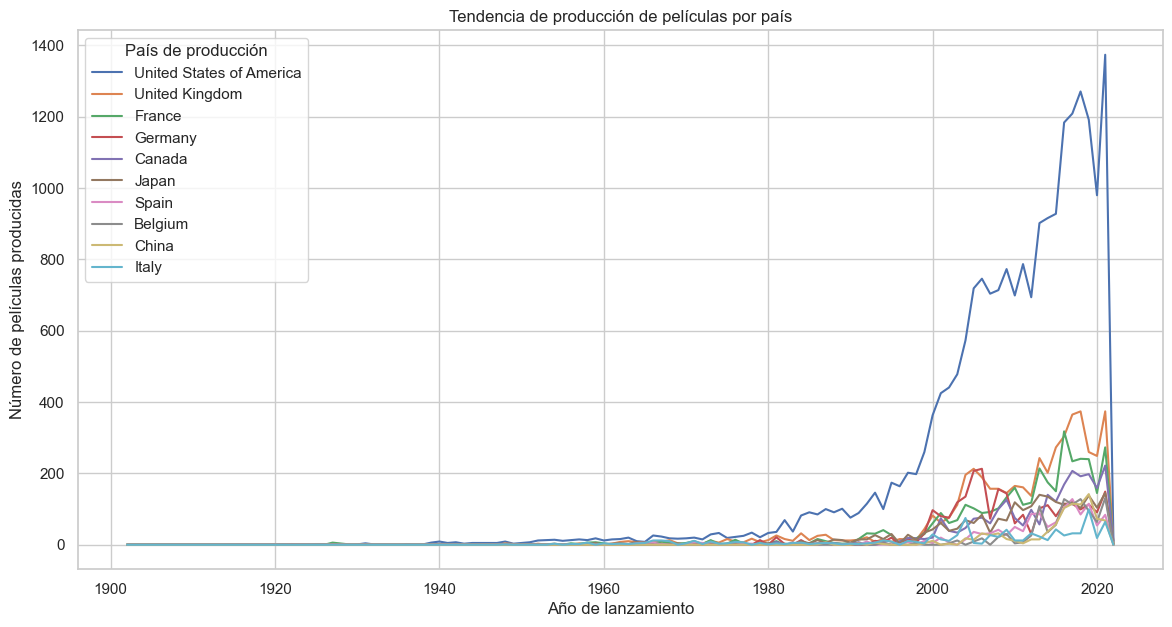

In [165]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['releaseYear'] = df['releaseDate'].dt.year
df['productionCountry'] = df['productionCountry'].str.split('|')
df = df.explode('productionCountry')

production_trend = df.groupby(['releaseYear', 'productionCountry']).size().unstack(fill_value=0)
top_countries = production_trend.sum().sort_values(ascending=False).head(10).index
production_trend[top_countries].plot(kind='line', figsize=(14, 7))
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de películas producidas')
plt.title('Tendencia de producción de películas por país')
plt.legend(title='País de producción')
plt.show()

> Estados Unidos es el país que más películas ha producido a lo largo del tiempo (1990-2020)

### Pregunta 5
¿Cómo influye el idioma en la recaudación de las películas?

Idiomas con mayores ingresos promedio:
originalLanguage
te    1.833474e+08
zh    1.606552e+08
en    1.129432e+08
hi    6.822458e+07
ar    6.497893e+07
cn    6.481634e+07
ja    4.846363e+07
ko    3.999488e+07
pt    3.186770e+07
fr    2.976923e+07
Name: revenue, dtype: float64


/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_46511/1237446656.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_language.head(10).index, y=revenue_by_language.head(10).values, palette="viridis")


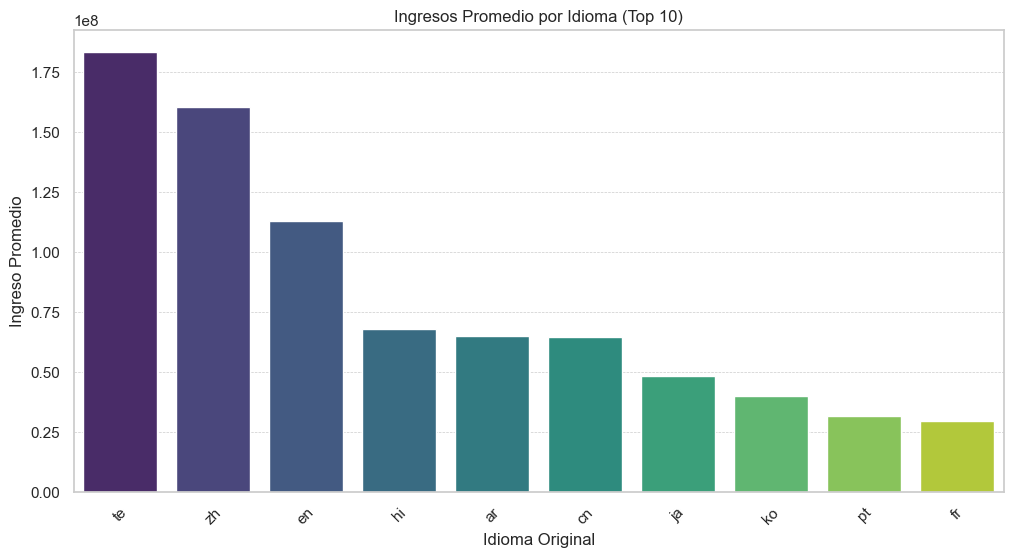

In [ ]:
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df_valid = df[df["revenue"] > 0]

revenue_by_language = df_valid.groupby("originalLanguage")["revenue"].mean().sort_values(ascending=False)

print("Idiomas con mayores ingresos promedio:")
print(revenue_by_language.head(10))
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_language.head(10).index, y=revenue_by_language.head(10).values, palette="viridis")
plt.xlabel("Idioma Original")
plt.ylabel("Ingreso Promedio")
plt.title("Ingresos Promedio por Idioma (Top 10)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

> Al parecer el idioma que más ha recaudado por produción original es telugu (te), seguido de mandarín (zh) y en tercer lugar inglés.

### Pregunta 6
¿Las películas dirigidas por múltiples directores tienen mejor rendimiento que las dirigidas por un solo director?

Ingresos promedio según cantidad de directores:
multipleDirectors
False    1.055907e+08
True     1.026615e+08
Name: revenue, dtype: float64


/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_46511/3124569662.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Un Director", "Múltiples Directores"], y=revenue_by_directors.values, palette="coolwarm")


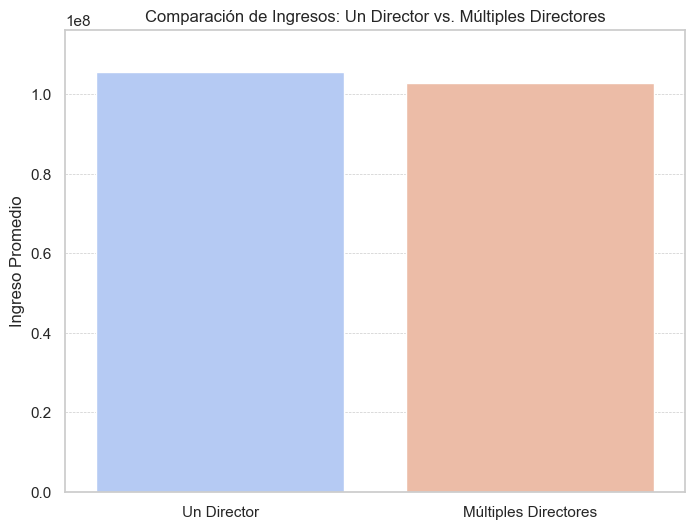

In [167]:
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df["director"] = df["director"].fillna("").astype(str).apply(lambda x: [d.strip() for d in x.split("|")] if "|" in x else [x])
df_exploded = df.explode("director")

df_exploded["multipleDirectors"] = df_exploded.groupby("id")["director"].transform("count") > 1

df_valid = df_exploded[df_exploded["revenue"] > 0]

revenue_by_directors = df_valid.groupby("multipleDirectors")["revenue"].mean()
print("Ingresos promedio según cantidad de directores:")
print(revenue_by_directors)

plt.figure(figsize=(8, 6))
sns.barplot(x=["Un Director", "Múltiples Directores"], y=revenue_by_directors.values, palette="coolwarm")
plt.ylabel("Ingreso Promedio")
plt.title("Comparación de Ingresos: Un Director vs. Múltiples Directores")
plt.ylim(0, revenue_by_directors.max() * 1.1)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

> Parece que sin importar que sea producida por varios o un solo director, el ingreso promedio realmente no cambia mucho.